#S09 T01:

## Descripció

Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.

## Nivell 1

### - Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
%matplotlib inline  




df = pd.read_csv('DelayedFlights.csv', sep=',')
df.drop(columns=df.columns[0],inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [32]:
df.info(verbose=True,show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1936758 non-null  int64  
 1   Month              1936758 non-null  int64  
 2   DayofMonth         1936758 non-null  int64  
 3   DayOfWeek          1936758 non-null  int64  
 4   DepTime            1936758 non-null  float64
 5   CRSDepTime         1936758 non-null  int64  
 6   ArrTime            1929648 non-null  float64
 7   CRSArrTime         1936758 non-null  int64  
 8   UniqueCarrier      1936758 non-null  object 
 9   FlightNum          1936758 non-null  int64  
 10  TailNum            1936753 non-null  object 
 11  ActualElapsedTime  1928371 non-null  float64
 12  CRSElapsedTime     1936560 non-null  float64
 13  AirTime            1928371 non-null  float64
 14  ArrDelay           1928371 non-null  float64
 15  DepDelay           1936758 non-n

In [33]:
df.shape

(1936758, 29)

In [34]:
df.drop(['DayOfWeek','TailNum'],axis=1,inplace=True)


In [35]:
df.count().sort_values()

LateAircraftDelay    1247488
NASDelay             1247488
WeatherDelay         1247488
CarrierDelay         1247488
SecurityDelay        1247488
ActualElapsedTime    1928371
AirTime              1928371
ArrDelay             1928371
ArrTime              1929648
TaxiIn               1929648
TaxiOut              1936303
CRSElapsedTime       1936560
Diverted             1936758
CancellationCode     1936758
Cancelled            1936758
Distance             1936758
Year                 1936758
Origin               1936758
FlightNum            1936758
UniqueCarrier        1936758
CRSArrTime           1936758
CRSDepTime           1936758
DepTime              1936758
DayofMonth           1936758
Month                1936758
Dest                 1936758
DepDelay             1936758
dtype: int64

In [36]:
df.isna().sum()


Year                      0
Month                     0
DayofMonth                0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [37]:
rows_orig,columns_orig=df.shape


In [38]:
for column in ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','SecurityDelay','LateAircraftDelay']:
    df[column]=df[column].fillna(0)
df.isna().sum()
df = df.dropna()

rows,columns=df.shape


In [39]:
rows_orig - rows 

8387

In [40]:
df.isna().sum()


Year                 0
Month                0
DayofMonth           0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [41]:
train, test = train_test_split(df, test_size=0.33, random_state=42, shuffle=True)

In [42]:
train.shape

(1292008, 27)

In [43]:
test.shape

(636363, 27)

In [44]:
print("verificamos que se ha dividido correctamente %0.2f%%"%((test.shape[0]/df.shape[0])*100))

verificamos que se ha dividido correctamente 33.00%


In [45]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,1292008.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,1292008.0,6.107818,3.479971,1.0,3.0,6.0,9.0,12.0
DayofMonth,1292008.0,15.753287,8.774204,1.0,8.0,16.0,23.0,31.0
DepTime,1292008.0,1518.910521,450.392076,1.0,1203.0,1545.0,1901.0,2400.0
CRSDepTime,1292008.0,1467.967734,424.744819,0.0,1135.0,1510.0,1816.0,2359.0
ArrTime,1292008.0,1610.646474,547.840555,1.0,1316.0,1715.0,2031.0,2400.0
CRSArrTime,1292008.0,1634.391560,464.612069,0.0,1325.0,1705.0,2015.0,2359.0
FlightNum,1292008.0,2184.685312,1944.413671,1.0,611.0,1544.0,3424.0,9741.0
ActualElapsedTime,1292008.0,133.217765,72.017775,14.0,80.0,116.0,165.0,1114.0
CRSElapsedTime,1292008.0,134.116485,71.189144,-21.0,82.0,116.0,165.0,660.0


In [46]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,636363.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,636363.0,6.107929,3.482343,1.0,3.0,6.0,9.0,12.0
DayofMonth,636363.0,15.749580,8.781368,1.0,8.0,16.0,23.0,31.0
DepTime,636363.0,1518.114450,450.522624,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,636363.0,1467.209476,424.693885,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,636363.0,1609.421558,548.325898,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,636363.0,1633.799663,464.661801,0.0,1325.0,1705.0,2014.0,2359.0
FlightNum,636363.0,2183.505858,1944.523548,1.0,610.0,1542.0,3421.0,9740.0
ActualElapsedTime,636363.0,133.484730,72.145588,15.0,80.0,116.0,165.0,750.0
CRSElapsedTime,636363.0,134.362510,71.322902,1.0,82.0,117.0,165.0,660.0


## Nivell 2

### - Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [47]:
columnas_categoricas = df.select_dtypes(np.object0).columns
columnas_categoricas
df_copy=df.copy()

In [48]:
df_copy['UniqueCarrier'] = df_copy['UniqueCarrier'].astype('category')
df_copy['UniqueCarrier'].unique()

['WN', 'XE', 'YV', 'OH', 'OO', ..., 'AA', 'AQ', 'AS', 'B6', 'CO']
Length: 20
Categories (20, object): ['9E', 'AA', 'AQ', 'AS', ..., 'US', 'WN', 'XE', 'YV']

In [49]:
df_copy['Origin'] = df_copy['Origin'].astype('category')
df_copy['Origin'].unique()

['IAD', 'IND', 'ISP', 'JAN', 'JAX', ..., 'OTH', 'LMT', 'ITH', 'HTS', 'PIR']
Length: 303
Categories (303, object): ['ABE', 'ABI', 'ABQ', 'ABY', ..., 'XNA', 'YAK', 'YKM', 'YUM']

In [50]:
df_copy['Dest'] = df_copy['Dest'].astype('category')
df_copy['Dest'].unique()



['TPA', 'BWI', 'JAX', 'LAS', 'MCO', ..., 'LMT', 'OTH', 'ITH', 'HTS', 'PIR']
Length: 302
Categories (302, object): ['ABE', 'ABI', 'ABQ', 'ABY', ..., 'XNA', 'YAK', 'YKM', 'YUM']

In [51]:
df_copy['CancellationCode'].unique()

array(['N'], dtype=object)

In [52]:
labelencoder = LabelEncoder()


In [53]:
le_d = LabelEncoder()
df_copy['Dest'] = le_d.fit_transform(df_copy['Dest'])
le_o = LabelEncoder()
df_copy['Origin'] = le_o.fit_transform(df_copy['Origin'])
le_u = LabelEncoder()
df_copy['UniqueCarrier'] = le_u.fit_transform(df_copy['UniqueCarrier'])

df_copy

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,2003.0,1955,2211.0,2225,17,335,128.0,...,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1,2008,1,3,754.0,735,1002.0,1000,17,3231,128.0,...,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
2,2008,1,3,628.0,620,804.0,750,17,448,96.0,...,3.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,3,1829.0,1755,1959.0,1925,17,3920,90.0,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,1940.0,1915,2121.0,2110,17,378,101.0,...,4.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,1250.0,1220,1617.0,1552,6,1621,147.0,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,657.0,600,904.0,749,6,1631,127.0,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,1007.0,847,1149.0,1010,6,1631,162.0,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,1251.0,1240,1446.0,1437,6,1639,115.0,...,13.0,13.0,0,N,0,0.0,0.0,0.0,0.0,0.0


In [54]:
df_copy['Origin'] = df_copy['Origin'].astype('category')
df_copy['Origin'].unique()

[135, 140, 143, 148, 149, ..., 212, 166, 144, 134, 223]
Length: 303
Categories (303, int64): [0, 1, 2, 3, ..., 299, 300, 301, 302]

In [55]:
columnas_numericas = df_copy.select_dtypes(np.number).columns
columnas_numericas

Index(['Year', 'Month', 'DayofMonth', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [56]:
features = df_copy[columnas_numericas]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [57]:
df_copy = pd.concat([df_copy,pd.get_dummies(df_copy.CancellationCode, dummy_na=False)],axis=1)
df_copy.drop('CancellationCode', axis=1,inplace=True)
df_copy.rename(columns={'N':"CancellationCode_N"},inplace=True)
df_copy

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode_N
0,2008,1,3,2003.0,1955,2211.0,2225,17,335,128.0,...,4.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0,1
1,2008,1,3,754.0,735,1002.0,1000,17,3231,128.0,...,5.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0,1
2,2008,1,3,628.0,620,804.0,750,17,448,96.0,...,3.0,17.0,0,0,0.0,0.0,0.0,0.0,0.0,1
3,2008,1,3,1829.0,1755,1959.0,1925,17,3920,90.0,...,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0,1
4,2008,1,3,1940.0,1915,2121.0,2110,17,378,101.0,...,4.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,1250.0,1220,1617.0,1552,6,1621,147.0,...,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0,1
1936754,2008,12,13,657.0,600,904.0,749,6,1631,127.0,...,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0,1
1936755,2008,12,13,1007.0,847,1149.0,1010,6,1631,162.0,...,8.0,32.0,0,0,1.0,0.0,19.0,0.0,79.0,1
1936756,2008,12,13,1251.0,1240,1446.0,1437,6,1639,115.0,...,13.0,13.0,0,0,0.0,0.0,0.0,0.0,0.0,1


In [58]:
df_copy.Origin=df_copy.Origin.astype(np.number)
df_copy.Dest=df_copy.Dest.astype(np.number)
df_copy.UniqueCarrier=df_copy.UniqueCarrier.astype(np.number)


In [59]:
cat_cols = train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols




['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']

In [60]:
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ]
                          )

reprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )
train_prep = preprocessor.fit_transform(train)
test_prep  = preprocessor.fit_transform(test)

test_prep

NameError: name 'preprocessor' is not defined

In [ ]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
df_train = pd.DataFrame.sparse.from_spmatrix(test_prep,columns=labels)


MemoryError: Unable to allocate 237. MiB for an array with shape (31008192,) and data type float64

In [ ]:
pd.DataFrame.sparse.from_spmatrix(train_prep)

,0,1,2,3,4,5,6,7,8,9,...,637,638,639,640,641,642,643,644,645,646
0,0.0,0.543735,1.167823,1.290186,1.134875,1.119584,1.055953,-0.232299,0.982844,1.136178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,-0.605700,-1.567469,1.192494,1.370311,1.345928,1.557447,2.266656,-0.294619,-0.085919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.118453,0.028118,-0.477163,-0.534363,-0.176414,-0.379654,-0.935339,-0.044680,0.040505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,-1.180418,1.167823,-0.665888,-0.748609,0.630391,0.616877,-0.461160,1.996483,1.922815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.693171,-1.567469,-1.038896,-1.450207,-0.691162,-1.272872,-1.041284,-0.447359,-0.324719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292003,0.0,-1.180418,0.484000,0.888314,1.017158,0.986334,1.101152,-0.801623,-0.572328,-0.394955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1292004,0.0,0.543735,-1.339528,-0.041987,-0.042302,0.031676,-0.005147,-0.953854,-0.627870,-0.451143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1292005,0.0,-1.467777,-1.453499,-1.294230,-1.290111,-0.871872,-1.130818,-0.920425,1.441065,1.332837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1292006,0.0,-0.605700,-1.681440,-1.691661,-1.784526,-1.284401,-1.763604,0.938748,-0.877808,-0.970886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
datos_train_prep.get_shape()

(1292008, 647)

## Nivell 3

### - Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

In [ ]:
df_copy.Origin.info()

<class 'pandas.core.series.Series'>
Int64Index: 1928371 entries, 0 to 1936757
Series name: Origin
Non-Null Count    Dtype  
--------------    -----  
1928371 non-null  float64
dtypes: float64(1)
memory usage: 29.4 MB


In [ ]:
df_copy.Origin.describe()

count    1.928371e+06
mean     1.464957e+02
std      8.010523e+01
min      0.000000e+00
25%      8.000000e+01
50%      1.550000e+02
75%      2.100000e+02
max      3.020000e+02
Name: Origin, dtype: float64

In [ ]:
df_copy.UniqueCarrier.describe(include='all')

count    1.928371e+06
mean     1.112361e+01
std      5.933310e+00
min      0.000000e+00
25%      6.000000e+00
50%      1.300000e+01
75%      1.700000e+01
max      1.900000e+01
Name: UniqueCarrier, dtype: float64

In [ ]:
df_copy.Dest.describe()

count    1.928371e+06
mean     1.499707e+02
std      8.075913e+01
min      0.000000e+00
25%      8.000000e+01
50%      1.570000e+02
75%      2.150000e+02
max      3.010000e+02
Name: Dest, dtype: float64

In [ ]:
df_copy.CancellationCode_N.describe()

count    1928371.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: CancellationCode_N, dtype: float64

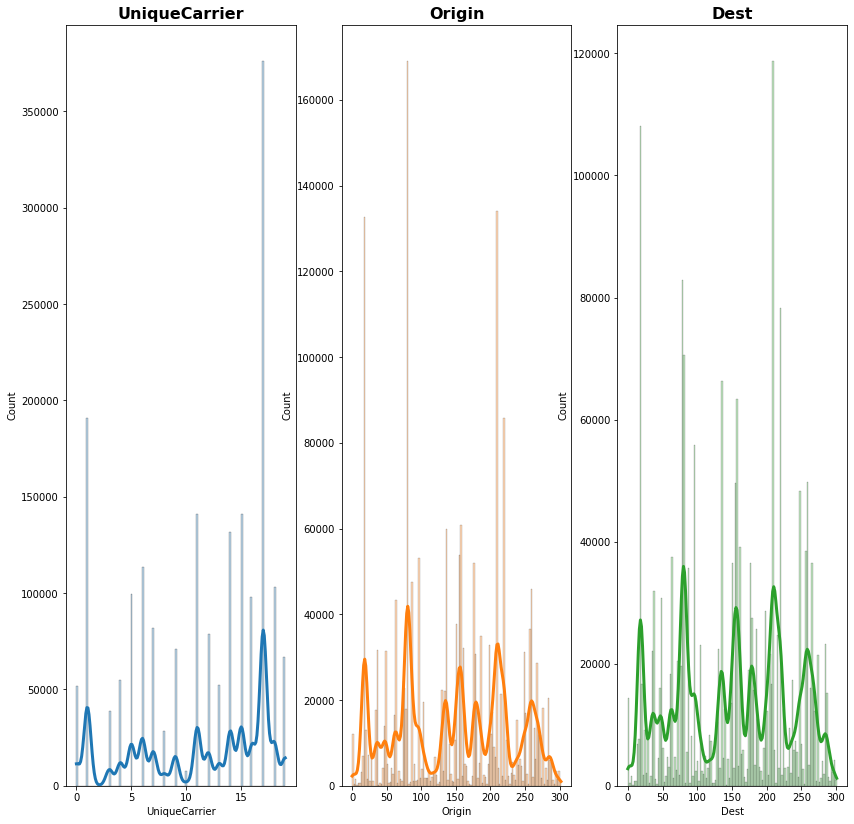

In [ ]:

fig, axes = plt.subplots(ncols=3, figsize=(14, 14))
count=0
for column in ['UniqueCarrier','Origin','Dest']:
    sns.histplot(
        data    = df_copy,
        x       = column,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[count]["color"],
        line_kws= {'linewidth': 3},
        alpha   = 0.3,
        ax      = axes[count]
    )
    axes[count].set_title(column, fontsize = 16, fontweight = "bold")
    count+=1



  

Text(0.5, 0.98, 'Heatmap Correlation Matrix')

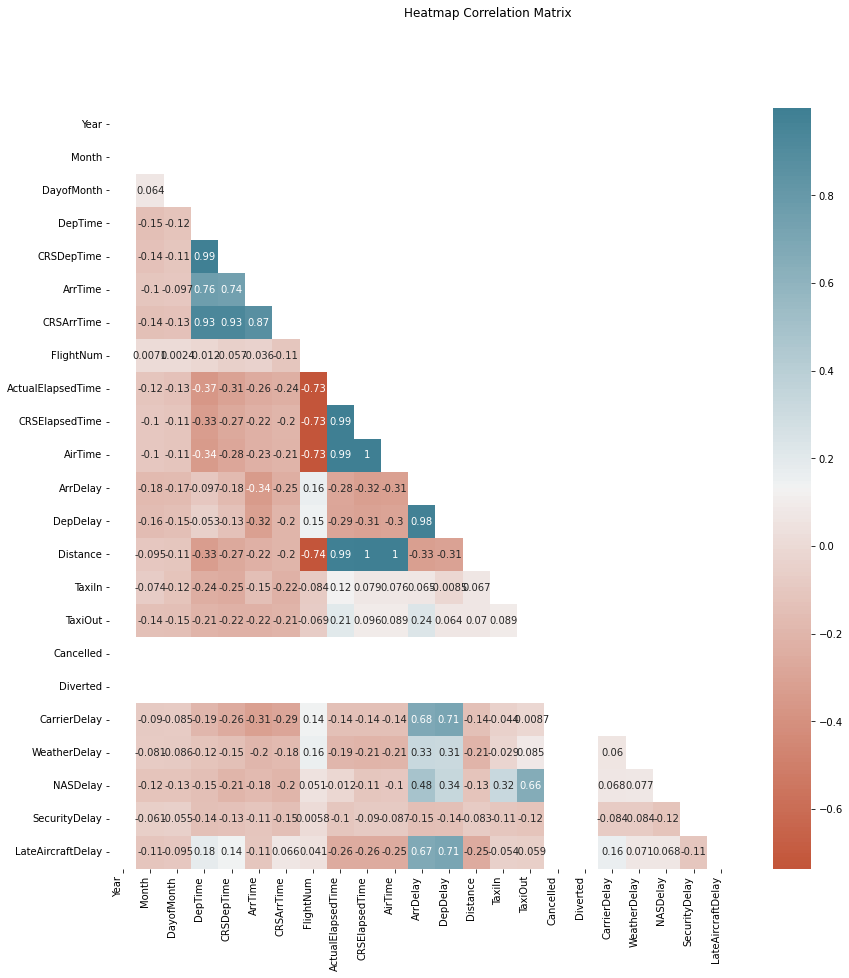

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 14))
corr= df.select_dtypes(include=['float64', 'int']).corr(method='pearson').corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, 
            annot=True, 
            mask=matrix, 
            cmap=sns.diverging_palette(20, 220, n=200),
            annot_kws = {"size": 10})

axes.set_xticklabels(
    axes.get_xticklabels(),
    horizontalalignment = 'right',
)
axes.set_yticklabels(
    axes.get_yticklabels(),

    horizontalalignment = 'right',
)

fig.suptitle('Heatmap Correlation Matrix')



In [ ]:
df_copy[["Origin", "Dest"]].groupby("CancellationCode").mean()

KeyError: 'CancellationCode'